In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

In [5]:
# date_Yoon = datetime.strptime("20181218", "%Y%m%d")
# date_1 = datetime.strptime("20181118", "%Y%m%d")
# date_2 = datetime.strptime("20180101", "%Y%m%d")
# date_3 = datetime.strptime("20190117", "%Y%m%d")
# print(date_Yoon-date_1)
# print(date_1-date_2)
# print(date_3-date_Yoon)

In [6]:
dataset_path = "C:/Users/lmnsjae/Desktop/DSL/24-1/EDA/dataset"

In [7]:
df_accident = {}
df_fatal = {}
df_injury = {}
df_dataset = [df_accident, df_fatal, df_injury]

for year in range(2005, 2023):
    for i in range(3):
        df_data = df_dataset[i]
        file_path = os.path.join(dataset_path, f"일자별 음주운전사고 {year}.xls")
        if os.path.exists(file_path):
            try:
                df_data[year] = pd.read_excel(file_path, header=1)
                row_to_drop = [j for j in range(40) if j % 3 != i]
                row_to_drop.append(i)
                df_data[year].drop(row_to_drop, inplace=True, axis=0)
                df_data[year].set_index(df_data[year].columns[0], inplace=True)
                col_to_drop = ["사고년도", "합계"]
                df_data[year].drop(col_to_drop, inplace=True, axis=1)
                if df_data[year].index.isna().any().any():
                    df_data[year].drop(np.nan, inplace=True, axis=0)

            except Exception as e:
                print(f"Error reading file for {i} year {year}: {e}")
        else:
            print(f"File not found for year: {year}")

In [8]:
# df_accident[2022]

In [9]:
# df_fatal[2021]

In [10]:
# df_injury[2022]

# Number of Accident

## Accident

### By Date

In [11]:
accident_by_date = np.zeros(0)

for year in range(2018, 2020):
    by_date = df_accident[year].values.flatten()
    by_date = by_date[by_date != '-']
    accident_by_date = np.concatenate((accident_by_date, by_date), axis=0)

mean_1 = np.mean(accident_by_date[:len(accident_by_date)//2])
mean_2 = np.mean(accident_by_date[len(accident_by_date)//2:])

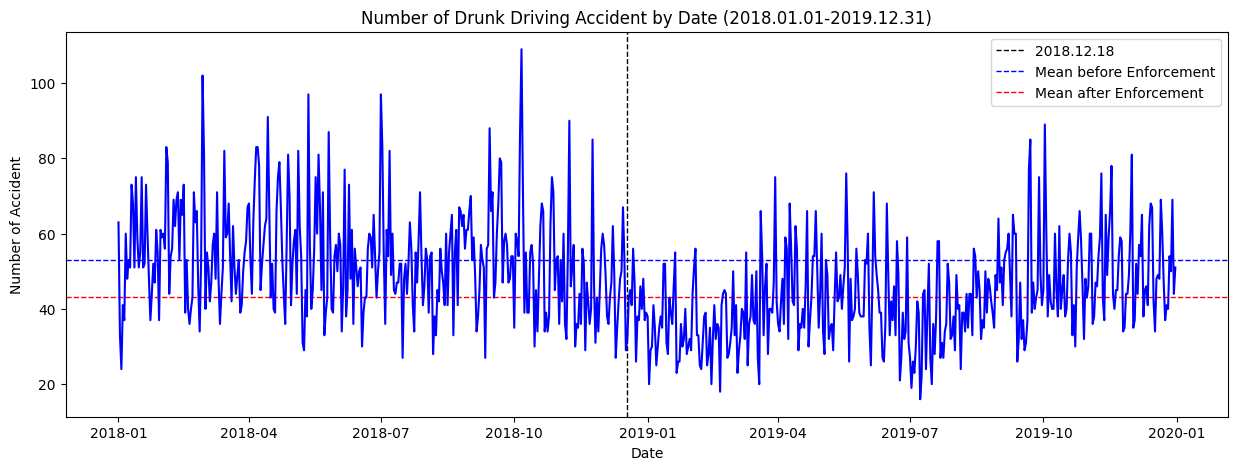

In [12]:
dates = pd.date_range(start='2018-01-01', periods=len(accident_by_date), freq='D')
date_of_interest = pd.Timestamp('2018-12-18')

plt.figure(figsize=(15, 5))
plt.axvline(x=date_of_interest, color='black', linestyle='--', linewidth=1, label="2018.12.18")
plt.axhline(y=mean_1, color='blue', linestyle='--', linewidth=1, label="Mean before Enforcement")
plt.axhline(y=mean_2, color='red', linestyle='--', linewidth=1, label="Mean after Enforcement")
plt.title("Number of Drunk Driving Accident by Date (2018.01.01-2019.12.31)")
plt.xlabel("Date")
plt.ylabel("Number of Accident")
plt.legend()
plt.plot(dates, accident_by_date, color="blue")
plt.show()

### By month

In [13]:
accident_by_month = np.zeros(0)

for year in range(2015, 2023):
    by_month = df_accident[year].copy(deep=True)
    by_month = by_month.replace('-', 0)
    by_month = by_month.sum(axis=1).values.flatten()
    accident_by_month = np.concatenate((accident_by_month, by_month), axis=0)

mean_1 = np.mean(accident_by_month[:len(accident_by_month)//2])
mean_2 = np.mean(accident_by_month[len(accident_by_month)//2:])

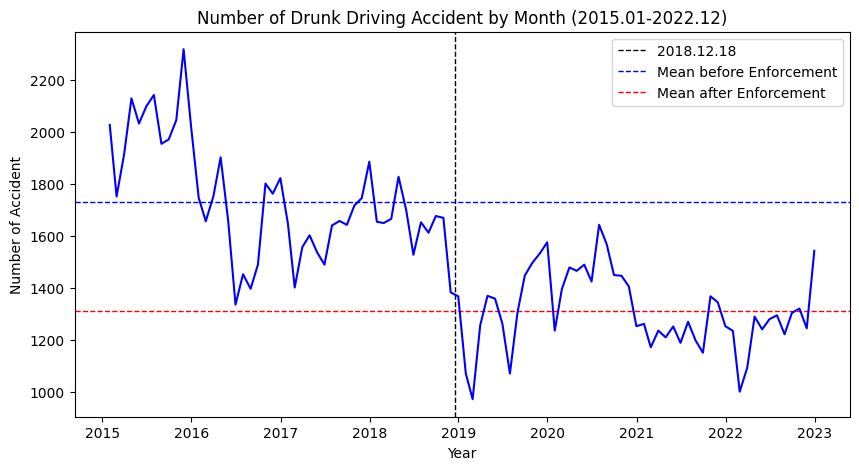

In [14]:
dates = pd.date_range(start='2015-01-01', periods=len(accident_by_month), freq='M')
date_of_interest = pd.Timestamp('2018-12-18')

plt.figure(figsize=(10, 5))
plt.axvline(x=date_of_interest, color='black', linestyle='--', linewidth=1, label="2018.12.18")
plt.axhline(y=mean_1, color='blue', linestyle='--', linewidth=1, label="Mean before Enforcement")
plt.axhline(y=mean_2, color='red', linestyle='--', linewidth=1, label="Mean after Enforcement")
plt.title("Number of Drunk Driving Accident by Month (2015.01-2022.12)")
plt.xlabel("Year")
plt.ylabel("Number of Accident")
plt.legend()
plt.plot(dates, accident_by_month, color="blue")
plt.show()

## Fatal (people)

### By month

In [15]:
# fatal_by_month = np.zeros(0)

# for year in range(2015, 2023):
#     by_month = df_fatal[year].copy(deep=True)
#     by_month = by_month.replace('-', 0)
#     by_month = by_month.sum(axis=1).values.flatten()
#     fatal_by_month = np.concatenate((fatal_by_month, by_month), axis=0)

# mean_1 = np.mean(fatal_by_month[:len(fatal_by_month)//2])
# mean_2 = np.mean(fatal_by_month[len(fatal_by_month)//2:])

In [16]:
# dates = pd.date_range(start='2015-01-01', periods=len(fatal_by_month), freq='M')
# date_of_interest = pd.Timestamp('2018-12-18')

# plt.figure(figsize=(10, 5))
# plt.axvline(x=date_of_interest, color='black', linestyle='--', linewidth=1, label="2018.12.18")
# plt.axhline(y=mean_1, color='blue', linestyle='--', linewidth=1, label="Mean before Enforcement")
# plt.axhline(y=mean_2, color='red', linestyle='--', linewidth=1, label="Mean after Enforcement")
# plt.title("Number of Deaths from Drunk Driving Accident by Month (2015.01-2022.12)")
# plt.xlabel("Year")
# plt.ylabel("Number of Deaths")
# plt.legend()
# plt.plot(dates, fatal_by_month)
# plt.show()

## Injury (people)

### By month

In [17]:
# injury_by_month = np.zeros(0)

# for year in range(2015, 2023):
#     by_month = df_injury[year].copy(deep=True)
#     by_month = by_month.replace('-', 0)
#     by_month = by_month.sum(axis=1).values.flatten()
#     injury_by_month = np.concatenate((injury_by_month, by_month), axis=0)

# mean_1 = np.mean(injury_by_month[:len(injury_by_month)//2])
# mean_2 = np.mean(injury_by_month[len(injury_by_month)//2:])

In [18]:
# dates = pd.date_range(start='2015-01-01', periods=len(injury_by_month), freq='M')
# date_of_interest = pd.Timestamp('2018-12-18')

# plt.figure(figsize=(10, 5))
# plt.axvline(x=date_of_interest, color='black', linestyle='--', linewidth=1, label="2018.12.18")
# plt.axhline(y=mean_1, color='blue', linestyle='--', linewidth=1, label="Mean before Enforcement")
# plt.axhline(y=mean_2, color='red', linestyle='--', linewidth=1, label="Mean after Enforcement")
# plt.title("Number of Injuries from Drunk Driving Accident by Month (2015.01-2022.12)")
# plt.xlabel("Year")
# plt.ylabel("Number of Injuries")
# plt.legend()
# plt.plot(dates, injury_by_month)
# plt.show()

# Rate of Change

In [19]:
def rate_of_change(data):
    rates = np.zeros(len(data)-1)
    for i in range(len(data)-1):
        rate = (data[i+1] - data[i]) / data[i+1] * 100
        rates[i] = rate
    return rates

## Accident

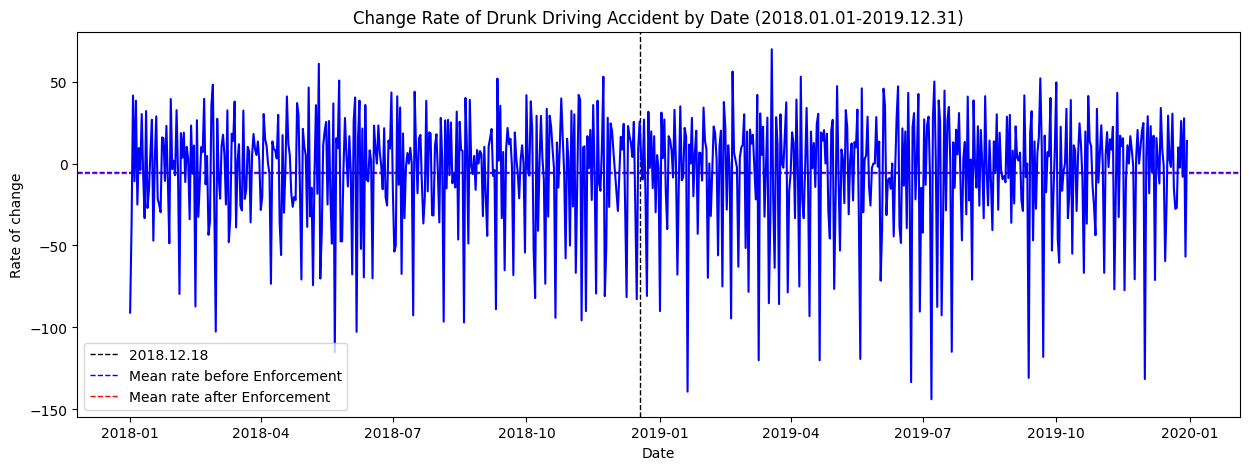

In [20]:
accident_by_date_rate = rate_of_change(accident_by_date)
mean_1 = np.mean(accident_by_date_rate[:len(accident_by_date_rate)//2])
mean_2 = np.mean(accident_by_date_rate[len(accident_by_date_rate)//2:])

dates = pd.date_range(start='2018-01-01', periods=len(accident_by_date_rate), freq='D')
date_of_interest = pd.Timestamp('2018-12-18')

plt.figure(figsize=(15, 5))
plt.axvline(x=date_of_interest, color='black', linestyle='--', linewidth=1, label="2018.12.18")
plt.axhline(y=mean_1, color='blue', linestyle='--', linewidth=1, label="Mean rate before Enforcement")
plt.axhline(y=mean_2, color='red', linestyle='--', linewidth=1, label="Mean rate after Enforcement")
plt.title("Change Rate of Drunk Driving Accident by Date (2018.01.01-2019.12.31)")
plt.xlabel("Date")
plt.ylabel("Rate of change")
plt.legend()
plt.plot(dates, accident_by_date_rate, color="blue")
plt.show()

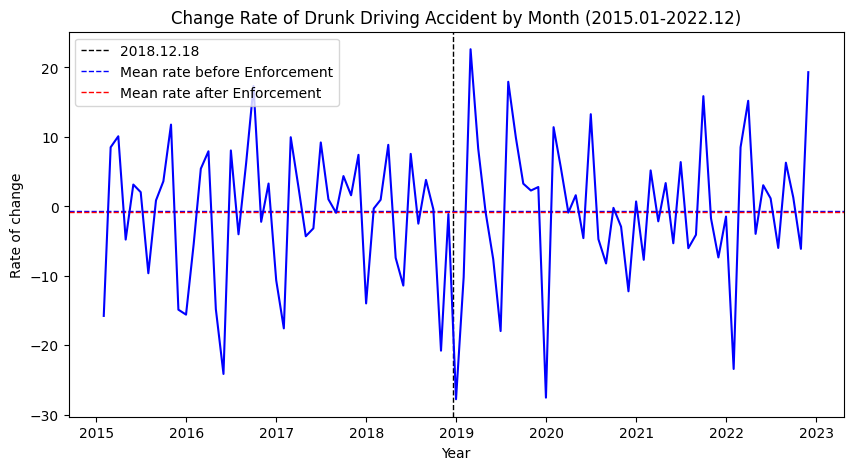

In [21]:
accident_by_month_rate = rate_of_change(accident_by_month)
mean_1 = np.mean(accident_by_month_rate[:35])
mean_2 = np.mean(accident_by_month_rate[35:])

dates = pd.date_range(start='2015-01-01', periods=len(accident_by_month_rate), freq='M')
date_of_interest = pd.Timestamp('2018-12-18')

plt.figure(figsize=(10, 5))
plt.axvline(x=date_of_interest, color='black', linestyle='--', linewidth=1, label="2018.12.18")
plt.axhline(y=mean_1, color='blue', linestyle='--', linewidth=1, label="Mean rate before Enforcement")
plt.axhline(y=mean_2, color='red', linestyle='--', linewidth=1, label="Mean rate after Enforcement")
plt.title("Change Rate of Drunk Driving Accident by Month (2015.01-2022.12)")
plt.xlabel("Year")
plt.ylabel("Rate of change")
plt.legend()
plt.plot(dates, accident_by_month_rate, color="blue")
plt.show()

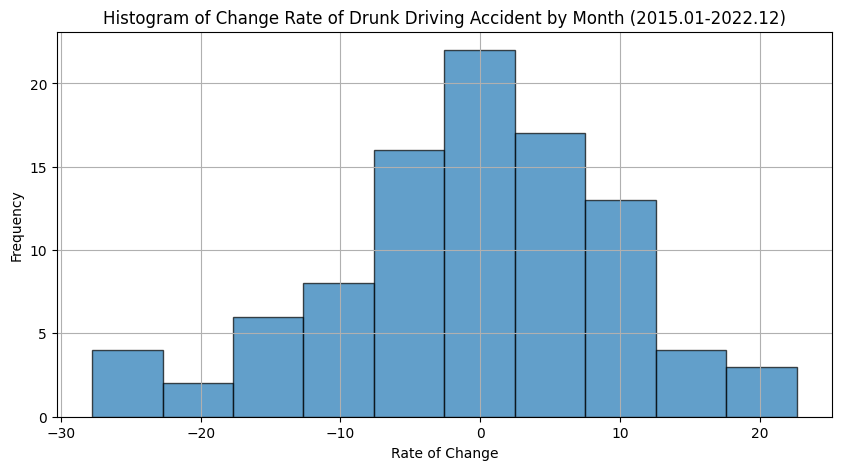

In [22]:
# Create a histogram
plt.figure(figsize=(10, 5))
plt.hist(accident_by_month_rate, bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Change Rate of Drunk Driving Accident by Month (2015.01-2022.12)')
plt.xlabel('Rate of Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

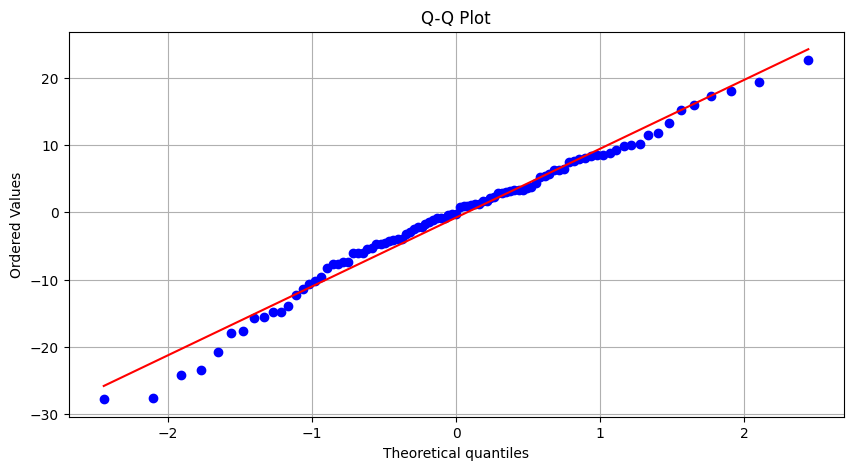

In [23]:
# Create a Q-Q plot
plt.figure(figsize=(10, 5))
stats.probplot(accident_by_month_rate, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [24]:
# ks_statistic, p_value = stats.kstest(accident_by_month_rate, 'norm')
# print(f"KS Statistic: {ks_statistic}")
# print(f"P-value: {p_value}")

In [25]:
shapiro_statistic, p_value = stats.shapiro(accident_by_month_rate)
print(f"Shapiro Statistic: {shapiro_statistic}")
print(f"P-value: {p_value}")

Shapiro Statistic: 0.9814579486846924
P-value: 0.19834856688976288


In [26]:
data1 = accident_by_month_rate[:35]
data2 = accident_by_month_rate[35:]
bartlett_statistic, p_value = stats.bartlett(data1, data2)
print(f"Bartlett Statistic: {bartlett_statistic}")
print(f"P-value: {p_value}")

Bartlett Statistic: 0.2158813389004107
P-value: 0.6421962119842893


In [27]:
t_statistic, p_value = stats.ttest_ind(data1, data2)

print(f"Independent two-sample t-test statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent two-sample t-test statistic: 0.09735774659837192
P-value: 0.9226518115192329


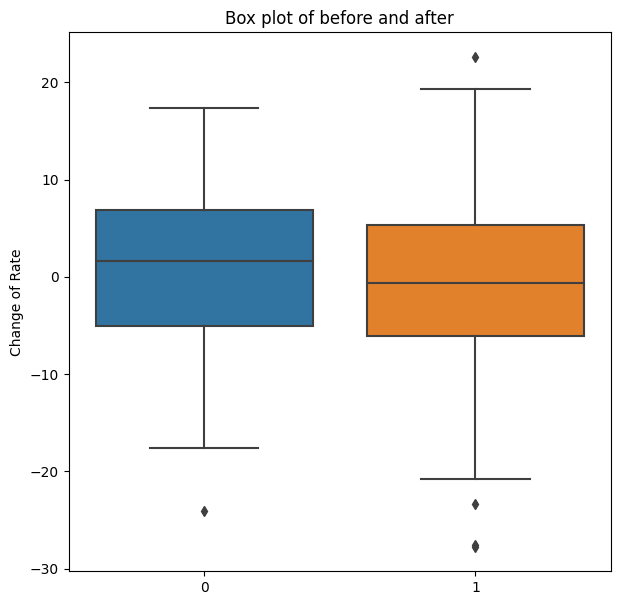

In [37]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=[data1, data2])
plt.title('Box plot of before and after')
plt.ylabel('Change of Rate')
plt.show()

## Fatal (people)

In [112]:
# fatal_by_month_rate = rate_of_change(fatal_by_month)
# mean_1 = np.mean(fatal_by_month_rate[:len(fatal_by_month_rate)//2])
# mean_2 = np.mean(fatal_by_month_rate[len(fatal_by_month_rate)//2:])

# dates = pd.date_range(start='2015-01-01', periods=len(fatal_by_month_rate), freq='M')
# date_of_interest = pd.Timestamp('2018-12-18')

# plt.figure(figsize=(10, 5))
# plt.axvline(x=date_of_interest, color='black', linestyle='--', linewidth=1, label="2018.12.18")
# plt.axhline(y=mean_1, color='blue', linestyle='--', linewidth=1, label="Mean rate before Enforcement")
# plt.axhline(y=mean_2, color='red', linestyle='--', linewidth=1, label="Mean rate after Enforcement")
# plt.title("Change Rate of Deaths from Drunk Driving Accident by Month (2015.01-2022.12)")
# plt.xlabel("Year")
# plt.ylabel("Rate of change")
# plt.legend()
# plt.plot(dates, fatal_by_month_rate)
# plt.show()

## Injuries (people)

In [113]:
# injury_by_month_rate = rate_of_change(injury_by_month)
# mean_1 = np.mean(injury_by_month_rate[:len(injury_by_month_rate)//2])
# mean_2 = np.mean(injury_by_month_rate[len(injury_by_month_rate)//2:])

# dates = pd.date_range(start='2015-01-01', periods=len(injury_by_month_rate), freq='M')
# date_of_interest = pd.Timestamp('2018-12-18')

# plt.figure(figsize=(10, 5))
# plt.axvline(x=date_of_interest, color='black', linestyle='--', linewidth=1, label="2018.12.18")
# plt.axhline(y=mean_1, color='blue', linestyle='--', linewidth=1, label="Mean rate before Enforcement")
# plt.axhline(y=mean_2, color='red', linestyle='--', linewidth=1, label="Mean rate after Enforcement")
# plt.title("Change Rate of Injuries from Drunk Driving Accident by Month (2015.01-2022.12)")
# plt.xlabel("Year")
# plt.ylabel("Rate of change")
# plt.legend()
# plt.plot(dates, injury_by_month_rate)
# plt.show()

# KBS

In [114]:
# accident_by_month = np.zeros(0)

# for year in range(2015, 2023):
#     by_month = df_accident[year].copy(deep=True)
#     by_month = by_month.replace('-', 0)
#     by_month = by_month.sum(axis=1).values.flatten()
#     accident_by_month = np.concatenate((accident_by_month, by_month), axis=0)

In [115]:
# file_path = os.path.join(dataset_path, "KBS.txt")
# KBS_data = pd.read_csv(file_path, sep="\t", header=0)
# KBS_data["Value"] = (KBS_data["Value"]+1)//173
# KBS = np.array(KBS_data["Value"])

In [116]:
# indice = np.where(KBS>250)
# KBS_new = np.delete(KBS, indice)
# accident_by_month_new = np.delete(accident_by_month, indice)

In [117]:
# dates = pd.date_range(start='2015-01-01', periods=len(KBS), freq='M')
# date_of_interest = pd.Timestamp('2018-12-01')

# plt.figure(figsize=(10, 5))
# plt.axvline(x=date_of_interest, color='red', linestyle='--', linewidth=1, label="2018.12.18")
# plt.title("KBS News uploaded in Naver (2005.01-2022.12)")
# plt.xlabel("Year")
# plt.ylabel("News")
# plt.legend()
# plt.plot(dates, KBS)
# plt.show()

In [118]:
# plt.figure(figsize=(10, 10))
# plt.title("Number of Accident by KBS News (2015.01-2022.12)")
# plt.xlabel("log(Number of KBS News)")
# plt.ylabel("Number of Accident")
# plt.legend()
# plt.scatter(np.log(KBS), accident_by_month)
# plt.show()

In [119]:
# model = LinearRegression().fit(np.log(KBS).reshape(-1,1), accident_by_month)
# coef = model.coef_[0]
# intercept = model.intercept_
# r_squared = model.score(np.log(KBS).reshape(-1,1), accident_by_month)
# print(f"Coefficient: {coef}")
# print(f"Intercept: {intercept}")
# print(f"R-squared: {r_squared}")

In [120]:
# pred = model.predict(np.array([2.5, 5.5]).reshape(-1, 1))

# plt.figure(figsize=(10, 10))
# plt.title("Number of Accident by KBS News (2015.01-2022.12)")
# plt.xlabel("log(Number of KBS News)")
# plt.ylabel("Number of Accident")
# plt.scatter(np.log(KBS), accident_by_month)
# plt.plot(np.array([2.5, 5.5]).reshape(-1, 1), pred, color="red")
# plt.show()

In [121]:
# # Testing the significance of the coefficient
# # Calculate the standard error and t-statistic
# x = KBS.reshape(-1,1)
# y = accident_by_month
# n = len(x)
# p = 1  # Number of predictors
# mse = np.mean((model.predict(x) - y) ** 2)
# se = np.sqrt(mse / (n - p - 1) / np.sum((x - np.mean(x)) ** 2))
# t_stat = coef / se

# # Calculate the p-value
# p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), n - p - 1))

# print(f"t-statistic: {t_stat}")
# print(f"p-value: {p_value}")

# # Check if the coefficient is significant
# alpha = 0.05  # Significance level
# if p_value < alpha:
#     print("The coefficient is statistically significant.")
# else:
#     print("The coefficient is not statistically significant.")

In [122]:
# plt.figure(figsize=(10, 10))
# plt.title("Number of Deaths by KBS News (2015.01-2022.12)")
# plt.xlabel("News")
# plt.ylabel("Number of deaths")
# plt.legend()
# plt.scatter(KBS, fatal_by_month)
# plt.show()

In [123]:
# plt.figure(figsize=(10, 10))
# plt.title("Number of Injuries by KBS News (2015.01-2022.12)")
# plt.xlabel("News")
# plt.ylabel("Number of injuries")
# plt.legend()
# plt.scatter(KBS, injury_by_month)
# plt.show()

# News

In [39]:
# from 2005 to 2022
accident_by_month_2005_2022 = np.zeros(0)

for year in range(2005, 2023):
    by_month = df_accident[year].copy(deep=True)
    by_month = by_month.replace('-', 0)
    by_month = by_month.sum(axis=1).values.flatten()
    accident_by_month_2005_2022 = np.concatenate((accident_by_month_2005_2022, by_month), axis=0)

In [40]:
file_path = os.path.join(dataset_path, "monthly_news_2005_2022.txt")
news_data = pd.read_csv(file_path, sep="\t", header=0)
news_data = np.array(news_data["value"])
news_data_log = np.log(news_data)

In [41]:
scaler = MinMaxScaler()
news_data_log = scaler.fit_transform(news_data_log.reshape(-1, 1))
accident_by_month_2005_2022 = scaler.fit_transform(accident_by_month_2005_2022.reshape(-1, 1))

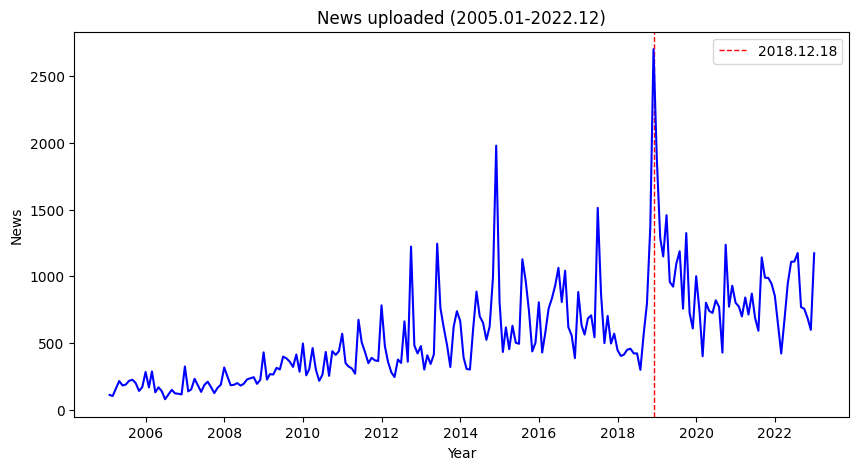

In [42]:
dates = pd.date_range(start='2005-01-01', periods=len(news_data), freq='M')
date_of_interest = pd.Timestamp('2018-12-01')

plt.figure(figsize=(10, 5))
plt.axvline(x=date_of_interest, color='red', linestyle='--', linewidth=1, label="2018.12.18")
plt.title("News uploaded (2005.01-2022.12)")
plt.xlabel("Year")
plt.ylabel("News")
plt.legend()
plt.plot(dates, news_data, color="blue")
plt.show()

In [72]:
# # Stack features and targets for joint outlier removal
# data = np.column_stack((news_data_log, accident_by_month_2005_2022))
# print(data.shape)

# # Calculate IQR
# Q1 = np.percentile(data, 25, axis=0)
# Q3 = np.percentile(data, 75, axis=0)
# IQR = Q3 - Q1

# # Define outliers
# outlier_mask = np.any((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)), axis=1)

# # Filter out the outliers
# data_no_outliers = data[~outlier_mask]

# # Separate features and targets again
# news_data_log_no_outliers = data_no_outliers[:, 0]
# accident_by_month_2005_2022_no_outliers = data_no_outliers[:, 1]

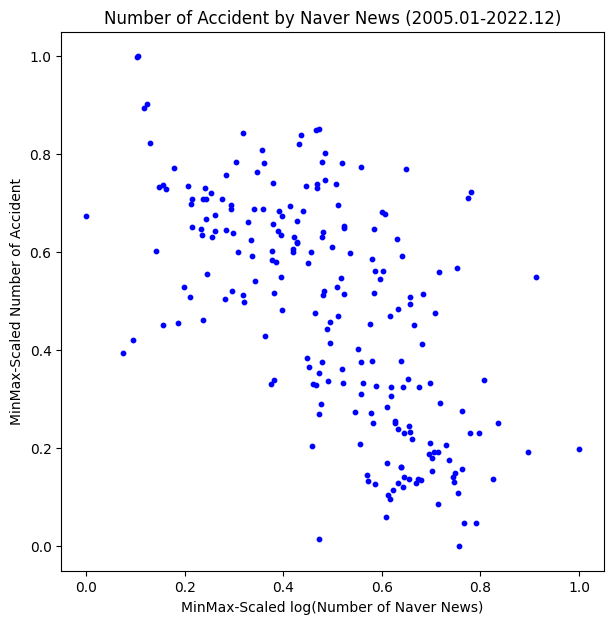

In [44]:
plt.figure(figsize=(7, 7))
plt.title("Number of Accident by Naver News (2005.01-2022.12)")
plt.xlabel("MinMax-Scaled log(Number of Naver News)")
plt.ylabel("MinMax-Scaled Number of Accident")
plt.scatter(news_data_log, accident_by_month_2005_2022, color='blue', s=10)
plt.show()

In [45]:
model = LinearRegression().fit(news_data_log.reshape(-1,1), accident_by_month_2005_2022)
coef = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(news_data_log.reshape(-1,1), accident_by_month_2005_2022)
print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")

Coefficient: [-0.77511023]
Intercept: [0.86019288]
R-squared: 0.4121725741303466


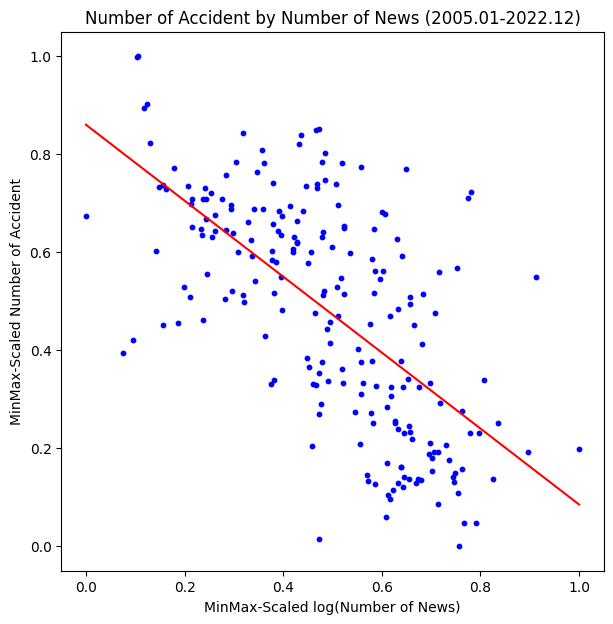

In [49]:
pred = model.predict(np.array([0.0, 1.0]).reshape(-1, 1))

plt.figure(figsize=(7, 7))
plt.title("Number of Accident by Number of News (2005.01-2022.12)")
plt.xlabel("MinMax-Scaled log(Number of News)")
plt.ylabel("MinMax-Scaled Number of Accident")
plt.scatter(news_data_log, accident_by_month_2005_2022, color='blue', s=10)
plt.plot(np.array([0.0, 1.0]).reshape(-1, 1), pred, color="red")
plt.show()

In [50]:
# Testing the significance of the coefficient
# Calculate the standard error and t-statistic
x = news_data_log
y = accident_by_month_2005_2022
n = len(x)
p = 1  # Number of predictors
mse = np.mean((model.predict(x) - y) ** 2)
se = np.sqrt(mse / (n - p - 1) / np.sum((x - np.mean(x)) ** 2))
t_stat = coef / se

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), n - p - 1))

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Check if the coefficient is significant
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The coefficient is statistically significant.")
else:
    print("The coefficient is not statistically significant.")

t-statistic: [-180.03145239]
p-value: [0.]
The coefficient is statistically significant.


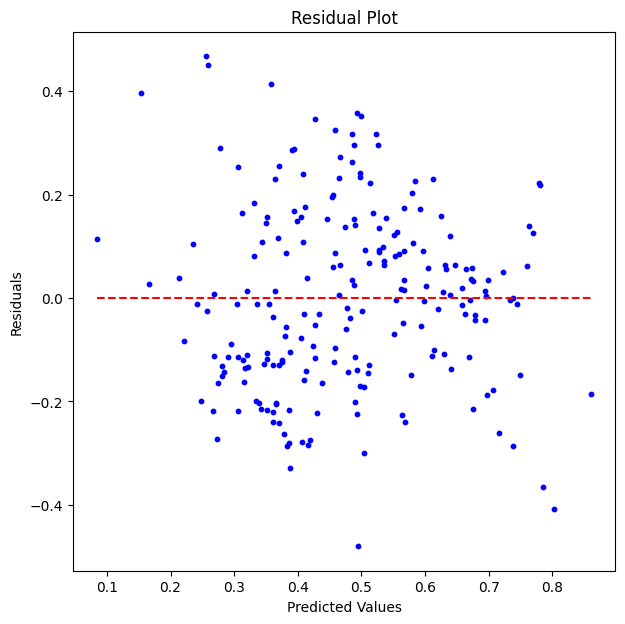

In [51]:
# Make predictions
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred

# Plotting the residual plot
plt.figure(figsize=(7, 7))
plt.scatter(y_pred, residuals, color='blue', s=10)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

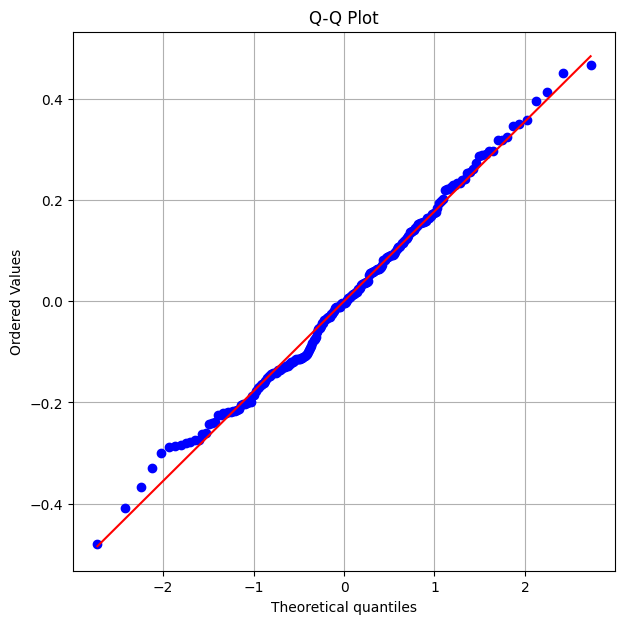

In [59]:
# Create a Q-Q plot
plt.figure(figsize=(7, 7))
stats.probplot((y-y_pred)[:, 0], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [52]:
shapiro_statistic, p_value = stats.shapiro(y-y_pred)
print(f"Shapiro Statistic: {shapiro_statistic}")
print(f"P-value: {p_value}")

Shapiro Statistic: 0.9929090142250061
P-value: 0.38782036304473877
